<a href="https://colab.research.google.com/github/Helzheng123/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from scipy.stats import chi2_contingency

**Chi-Square Test**

Gender vs Sleep Disorder

In [2]:
# Read Data
df0 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df0

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
# Count how many for each in Gender
df0['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [4]:
# Count how many for each in Sleep Disorder
df0['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [5]:
contingency_table = pd.crosstab(df0['Gender'], df0['Sleep Disorder'])
print(contingency_table)

Sleep Disorder  Insomnia  None  Sleep Apnea
Gender                                     
Female                36    82           67
Male                  41   137           11


In [6]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Counts: {expected}")

Chi2 value: 54.30602007353474
P-value: 1.6128633524576768e-12
Degrees of Freedom: 2
Expected Counts: [[ 38.08823529 108.32887701  38.5828877 ]
 [ 38.91176471 110.67112299  39.4171123 ]]


**T-Test**

Gender (Male vs Female) vs Physical Activity Level

In [7]:
from scipy.stats import ttest_ind

In [8]:
# Read data

df1 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
len(df1)

374

In [9]:
# Drop any incomplete rows
df = df1.dropna()
len(df)

374

In [10]:
# Separate the Gender into Male and Female

male_data = df1[df1['Gender'] == 'Male']['Physical Activity Level']
female_data = df1[df1['Gender'] == 'Female']['Physical Activity Level']

print(male_data)
print(female_data)

0      42
1      60
2      60
3      30
4      30
       ..
249    45
264    65
266    65
276    85
277    85
Name: Physical Activity Level, Length: 189, dtype: int64
16     40
18     40
30     35
31     35
32     75
       ..
369    75
370    75
371    75
372    75
373    75
Name: Physical Activity Level, Length: 185, dtype: int64


In [11]:
t_stat, p_val = ttest_ind(male_data, female_data, equal_var=False)

In [12]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.028048144471380786
P-value: 0.9776388132184118


In [13]:
male_mean = male_data.mean()
female_mean = female_data.mean()

print(f"Mean prevalence for Males: {male_mean}")
print(f"Mean prevalence for Females: {female_mean}")

Mean prevalence for Males: 59.2010582010582
Mean prevalence for Females: 59.14054054054054


**One Way ANOVA Test**

BMI Category (Normal, Overweight, Obese) vs Daily Steps

In [14]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [19]:
model = ols('Daily Steps ~ C(BMI Category)', data=df1).fit()

SyntaxError: ignored

In [20]:
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

## get means for each payer group of overall opioid
df1.groupby('BMICategory')['DailySteps'].mean()

NameError: ignored

**Regression**

In [20]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [21]:
df2 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [27]:
df = df[(df['Quality of Sleep'] - df['Quality of Sleep'].mean()) / df['Quality of Sleep'].std() < 3]
df = df[(df['Sleep Duration'] - df['Sleep Duration'].mean()) / df['Sleep Duration'].std() < 3]

In [28]:
X = df2['Quality of Sleep']
y = df2['Sleep Duration']

In [29]:
# Add a constant to the independent variable (required for the statsmodels regression model)
X = sm.add_constant(X)

In [34]:
# Fit the regression model
model2 = sm.OLS(y, X).fit()

In [35]:
# Print the summary of the regression
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Sleep Duration   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.17e-124
Time:                        00:07:38   Log-Likelihood:                -161.49
No. Observations:                 374   AIC:                             327.0
Df Residuals:                     372   BIC:                             334.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.8387      0.120  

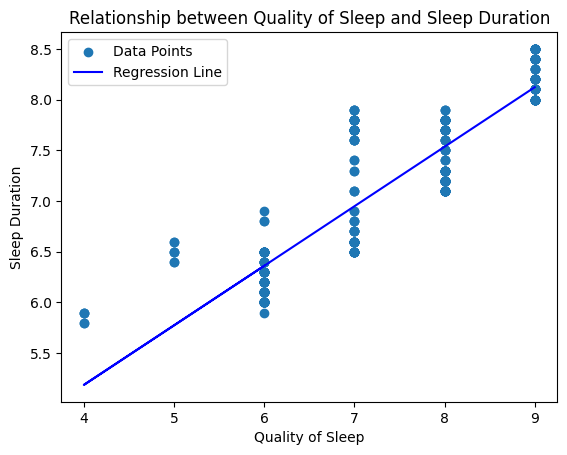

In [39]:
plt.scatter(df2['Quality of Sleep'], df2['Sleep Duration'], label='Data Points')
plt.plot(df1['Quality of Sleep'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.title('Relationship between Quality of Sleep and Sleep Duration')
plt.legend()
plt.show()